<a href="https://colab.research.google.com/github/Sahil7151/my_data_science_project/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
movie = pd.read_csv('/content/movies_metadata.csv')

<ipython-input-5-ad96ca932b3a>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie = pd.read_csv('/content/movies_metadata.csv')


In [ ]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movie.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
8960,False,"{'id': 287016, 'name': ""Wong Kar-Wai's Informa...",0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.kino.com/daysofbeingwild/,18311,tt0101258,cn,阿飛正傳,The movie is set in Hong Kong and the Philippi...,...,1990-12-15,141864,91.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,NaN,Days of Being Wild,False,7.3,85.0
8961,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,48448,tt0101268,en,Across the Tracks,When Billy returns from reform school he has t...,...,1991-02-14,0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Across the Tracks,False,5.5,17.0
8962,False,"{'id': 476066, 'name': 'Begotten Collection', ...",33000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",NaN,1483,tt0101420,en,Begotten,"Begotten is the creation myth brought to life,...",...,1990-04-30,0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Begotten,False,5.0,64.0
8963,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",NaN,41783,tt0101440,zh,Bian zou bian chang,Two blind men pursue ephemeral and unlikely ho...,...,1991-09-08,0,110.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,NaN,Life on a String,False,7.0,2.0
8964,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,28553,tt0101531,en,Cadence,"As punishment for drunken, rebellious behavior...",...,1990-11-16,0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometim,NaN,NaN,NaN,NaN


In [ ]:
movie.shape

(45466, 24)

In [ ]:
for i in movie.columns:
  print(i)

adult
belongs_to_collection
budget
genres
homepage
id
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count


In [ ]:
movie.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
movie['original_language'].value_counts()

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: original_language, Length: 92, dtype: int64

In [ ]:
movie['original_language'].value_counts()[0:10]

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

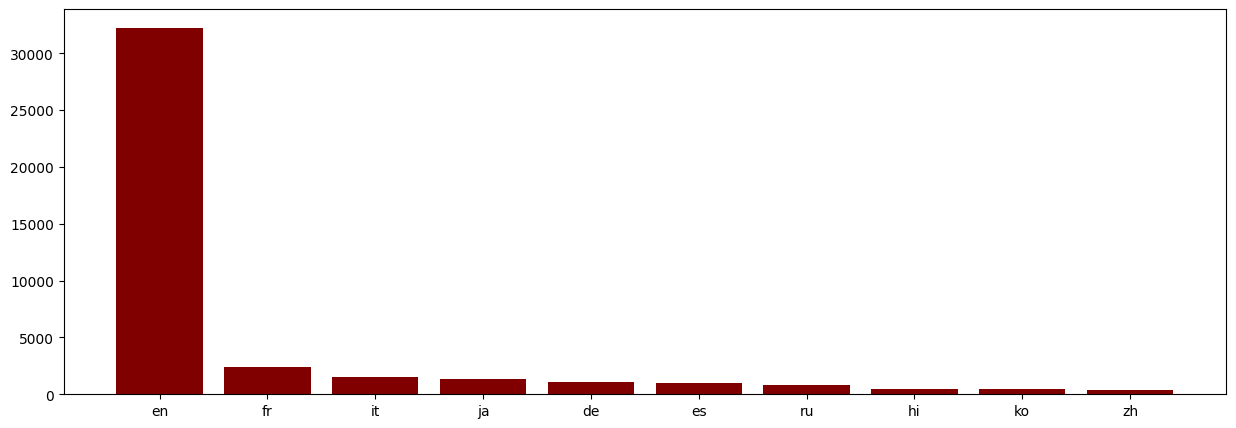

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(list(movie['original_language'].value_counts()[0:10].keys()),list(movie['original_language'].value_counts()[0:10]),color="maroon")
plt.show()

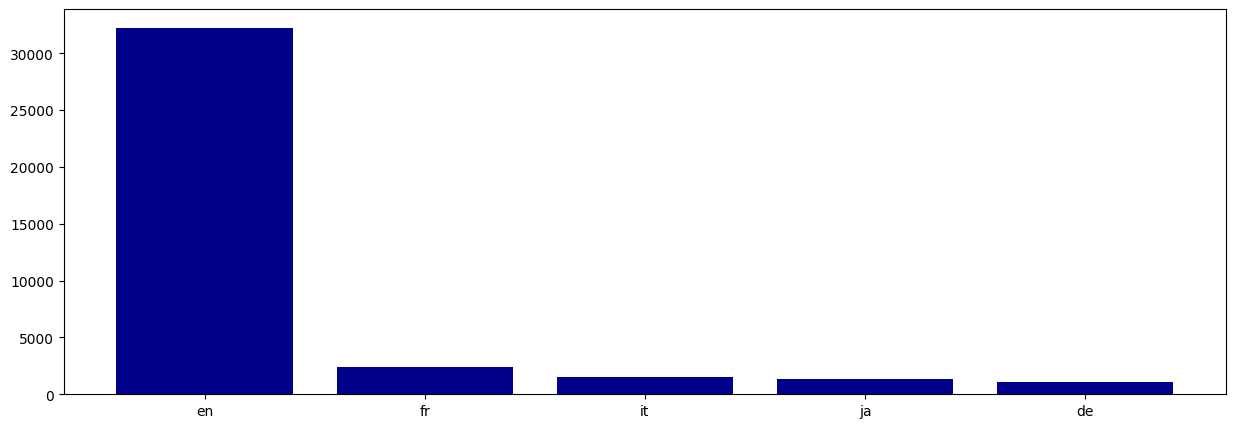

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(list(movie['original_language'].value_counts()[0:5].keys()),list(movie['original_language'].value_counts()[0:5]),color="darkblue")
plt.show()

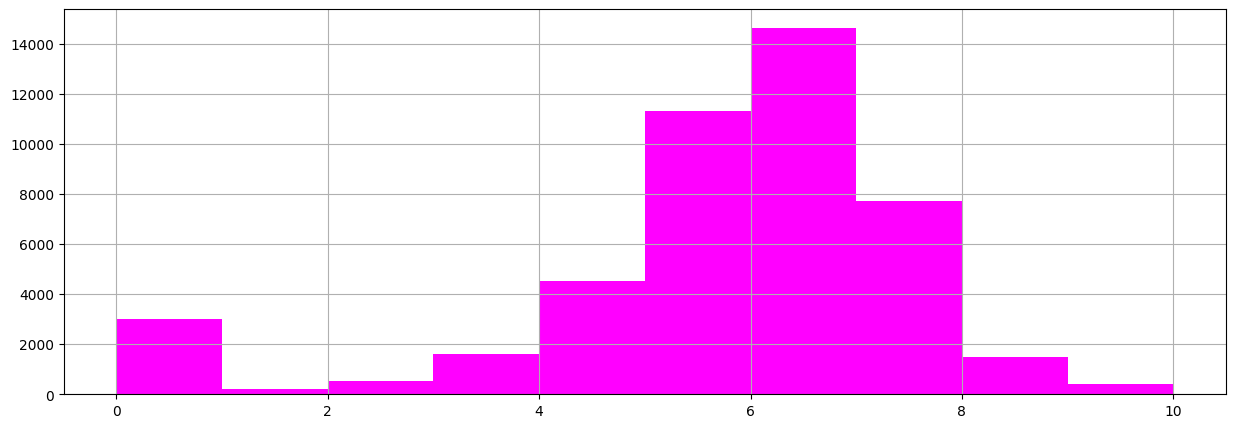

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(movie['vote_average'],color='magenta')
plt.grid(True)
plt.show()

In [ ]:
high_rated_movies=movie[movie['vote_average']>=8]

In [ ]:
high_rated_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
46,False,NaN,33000000,"[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...",http://www.sevenmovie.com/,807,tt0114369,en,Se7en,Two homicide detectives are on a desperate hun...,...,1995-09-22,327311859.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Seven deadly sins. Seven ways to die.,Se7en,False,8.1,5915.0
49,False,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.mgm.com/#/our-titles/2083/The-Usual...,629,tt0114814,en,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin...",...,1995-07-19,23341568.0,106.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Five Criminals. One Line Up. No Coincidence.,The Usual Suspects,False,8.1,3334.0
109,False,NaN,1300000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,103,tt0075314,en,Taxi Driver,A mentally unstable Vietnam War veteran works ...,...,1976-02-07,28262574.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"On every street in every city, there's a nobod...",Taxi Driver,False,8.1,2632.0
186,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,58372,tt0114241,en,Reckless,"On Christmas eve, a relentlessly cheerful woma...",...,1995-11-17,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The most twisted Christmas ever.,Reckless,False,10.0,1.0
256,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0


In [ ]:
high_rated_movies.shape

(1895, 24)

In [ ]:
top5_high=high_rated_movies.sort_values(by="vote_average",ascending=False).head()

In [ ]:
top5_high

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28825,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",https://www.facebook.com/SouthernBaptistSissies,260176,tt2729818,en,Southern Baptist Sissies,Southern Baptist Sissies is the live film of t...,...,2013-11-18,0.0,138.0,[],Released,NaN,Southern Baptist Sissies,False,10.0,1.0
8926,False,NaN,0,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,114524,tt0097099,en,Common Threads: Stories from the Quilt,"In the late 1970s, a mysterious new disease be...",...,1989-12-01,0.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Common Threads: Stories from the Quilt,False,10.0,2.0
33627,False,NaN,0,[],NaN,267178,tt1826550,en,Mad As Hell,MAD AS HELL follows Cenk Uygur's transformatio...,...,2014-04-29,0.0,80.0,[],Released,NaN,Mad As Hell,False,10.0,1.0
33389,False,NaN,1800000,[],http://www.theitaliankey.com/,134782,tt1465513,en,The Italian Key,A romantic fairy tale about a 19-year old orph...,...,2011-05-14,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Italian Key,False,10.0,1.0
33280,False,NaN,0,[],NaN,123691,tt0104140,en,Dream Deceivers: The Story Behind James Vance ...,A chilling post mortem on the tragic case of t...,...,1992-08-06,0.0,61.0,[],NaN,Heavy Metal Goes On Trial,Dream Deceivers: The Story Behind James Vance ...,False,10.0,1.0


In [ ]:
top5_revenue=movie.sort_values(by="revenue",ascending=False).head()

In [ ]:
top5_revenue

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
26555,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,...,2015-12-15,2.068224e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.5,7993.0
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0
17818,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,2012-04-25,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000.0
25084,False,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,Jurassic World,Twenty-two years after the events of Jurassic ...,...,2015-06-09,1.513529e+09,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,Jurassic World,False,6.5,8842.0


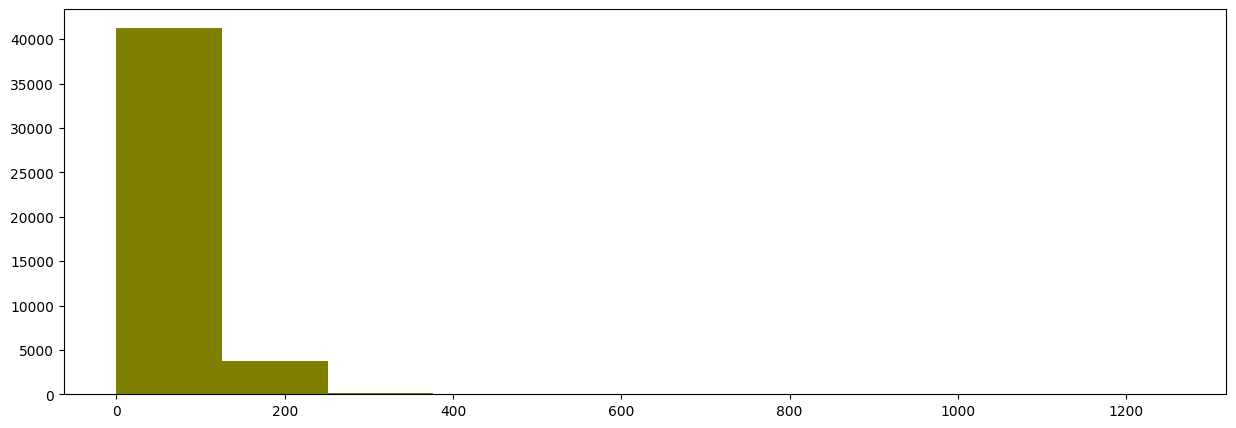

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(movie['runtime'],color='olive')
plt.show()

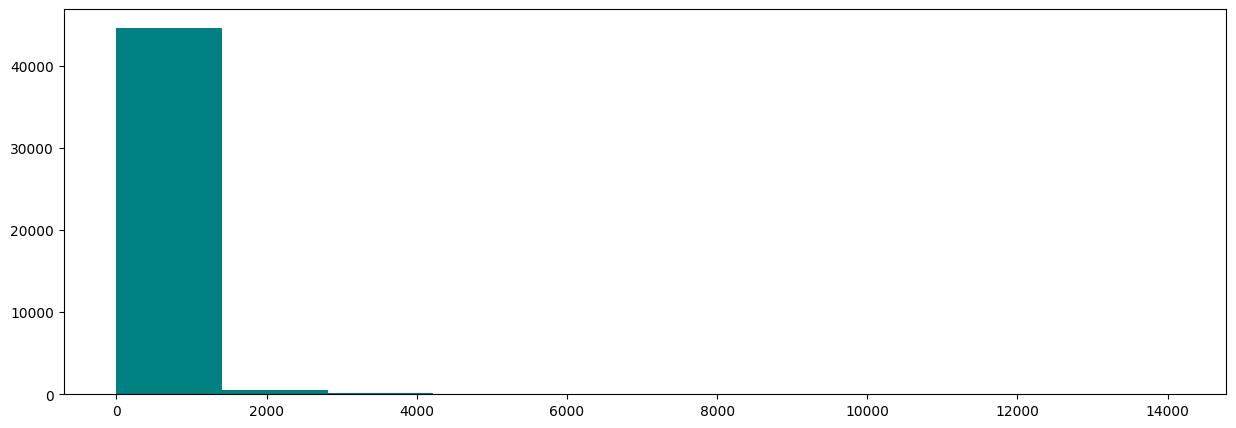

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(movie['vote_count'],color="Teal")
plt.show()

In [ ]:
movie['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [2]:
ratings_details = pd.read_csv("/content/ratings.csv")

In [3]:
ratings_details.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings_details.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [5]:
ratings_details.shape

(100836, 4)

In [12]:
ratings_details.describe

<bound method NDFrame.describe of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]>

In [23]:
ratings_details.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
ratings_details['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

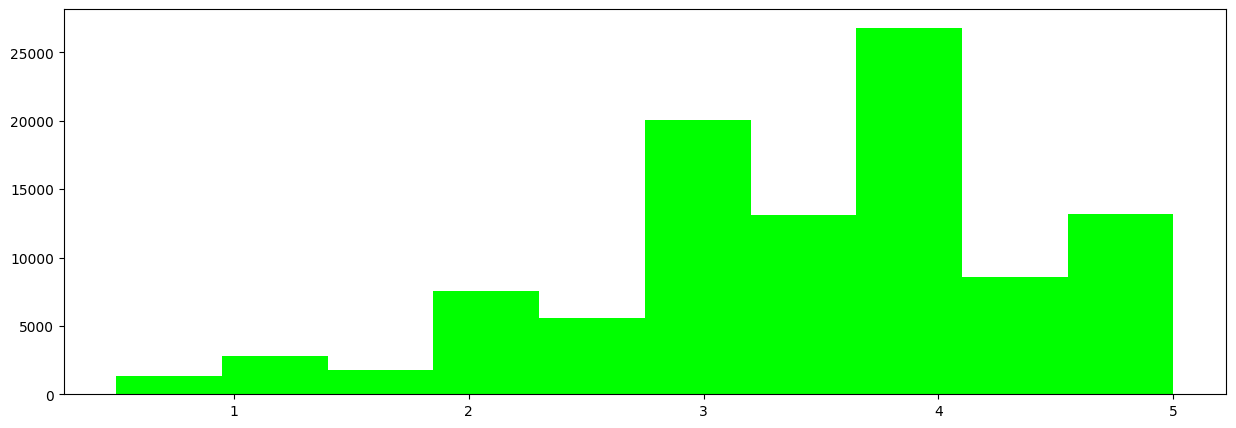

In [18]:
plt.figure(figsize=(15,5))
plt.hist(ratings_details['rating'],color="lime")
plt.show()

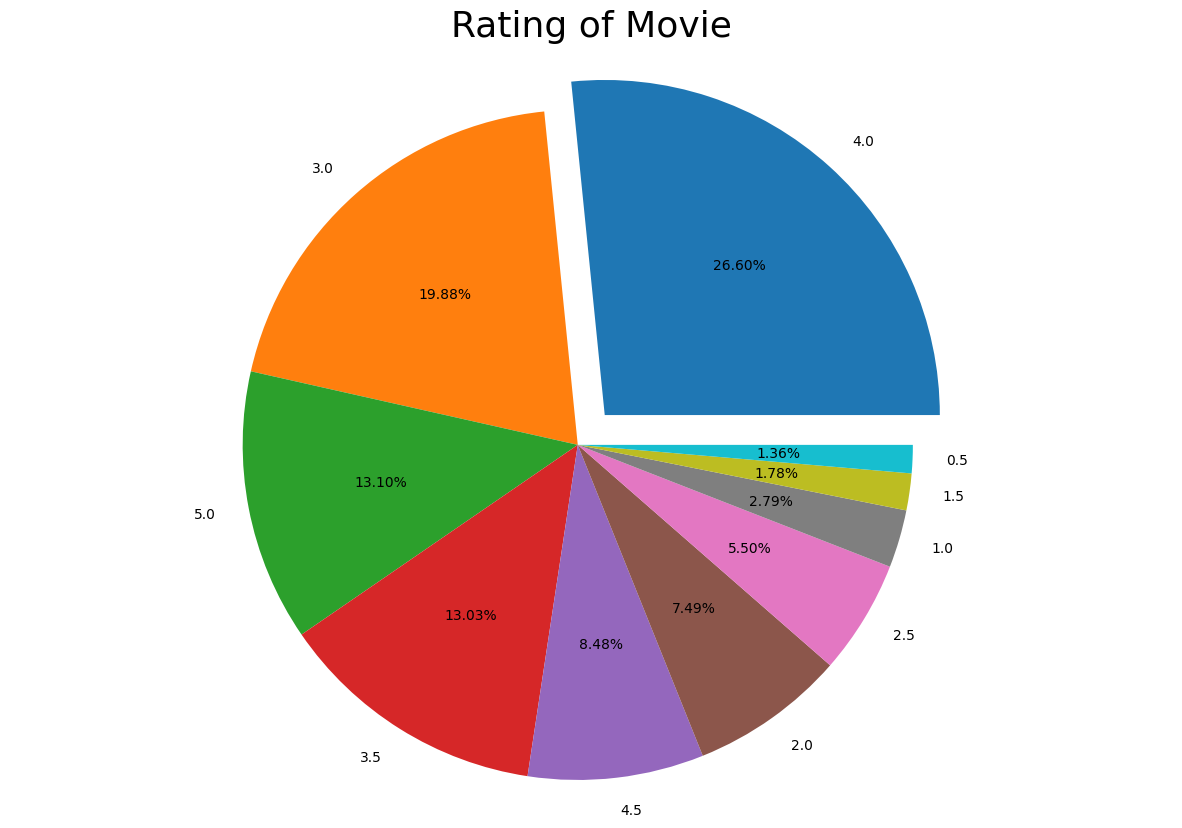

In [20]:
explode = (0.12,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(15,10))
plt.pie(list(ratings_details['rating'].value_counts()),labels=list(ratings_details['rating'].value_counts().keys()),autopct='%0.2f%%',explode=explode)
plt.axis('equal')
plt.title('Rating of Movie',fontsize=26)
plt.show()

In [21]:
!wget https://www.dropbox.com/s/9vk3xh99pt5f271/movies.csv

--2023-09-02 07:53:44--  https://www.dropbox.com/s/9vk3xh99pt5f271/movies.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘movies.csv’

movies.csv              [ <=>                ]  69.75K  --.-KB/s    in 0.09s   

2023-09-02 07:53:44 (782 KB/s) - ‘movies.csv’ saved [71424]



In [6]:
movie_details = pd.read_csv('/content/movies.csv')

In [7]:
movie_details.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movie_details.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [9]:
movie_details.shape

(9742, 3)

In [11]:
movie_details['genres'].value_counts()

Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: genres, Length: 951, dtype: int64

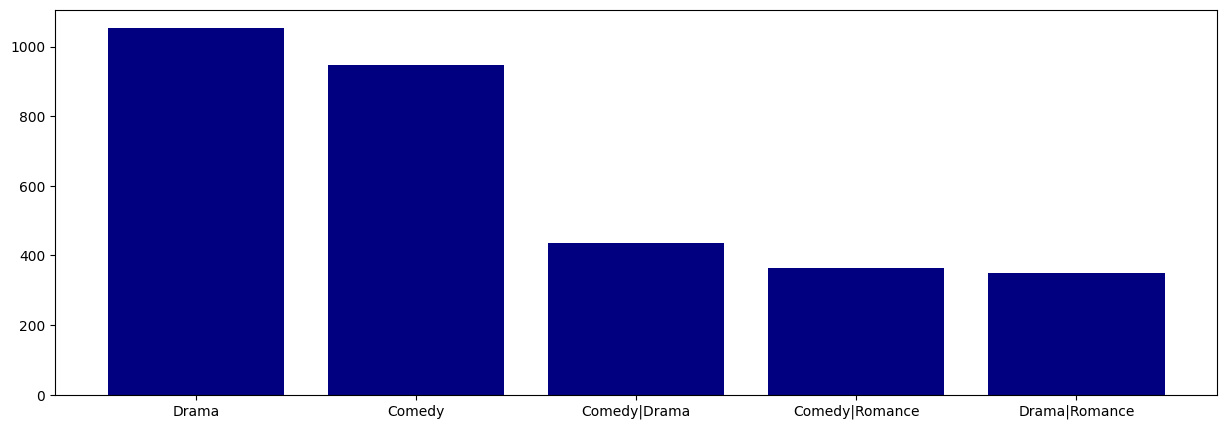

In [15]:
plt.figure(figsize=(15,5))
plt.bar(list(movie_details['genres'].value_counts()[0:5].keys()),list(movie_details['genres'].value_counts()[0:5]),color="navy")
plt.show()

In [17]:
dataset = pd.merge(ratings_details,movie_details,on='movieId')

In [19]:
dataset.shape

(100836, 6)

In [24]:
dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [22]:
dataset["rating"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [25]:
dataset.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [26]:
dataset.tail(3)

,userId,movieId,rating,timestamp,title,genres
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


In [28]:
import datetime
from datetime import datetime, date

In [29]:
dataset['datetime'] = pd.to_datetime(dataset["timestamp"])

In [30]:
dataset.head()

,userId,movieId,rating,timestamp,title,genres,datetime
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:00.964982703
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:00.847434962
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.106635946
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.510577970
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.305696483


In [31]:
dataset.shape

(100836, 7)

In [33]:
dataset.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
datetime     85043
dtype: int64

In [34]:
dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [35]:
#Average rating of each movie

a = dataset
a = a.groupby('title')['rating'].mean()

# According to the title in data it group it with its mean of rating

In [36]:
a

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [37]:
sorted_movie_rating = a.sort_values(ascending=False)

In [38]:
sorted_movie_rating

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [40]:
sorted_movie_rating.keys()[0:10]

Index(['Gena the Crocodile (1969)', 'True Stories (1986)',
       'Cosmic Scrat-tastrophe (2015)', 'Love and Pigeons (1985)',
       'Red Sorghum (Hong gao liang) (1987)',
       'Thin Line Between Love and Hate, A (1996)', 'Lesson Faust (1994)',
       'Eva (2011)', 'Who Killed Chea Vichea? (2010)', 'Siam Sunset (1999)'],
      dtype='object', name='title')

In [41]:
sorted_movie_rating.value_counts()

4.000000    1008
3.000000     916
3.500000     910
2.500000     520
2.000000     443
            ... 
3.640625       1
3.640496       1
3.637500       1
3.635922       1
3.496212       1
Name: rating, Length: 1287, dtype: int64

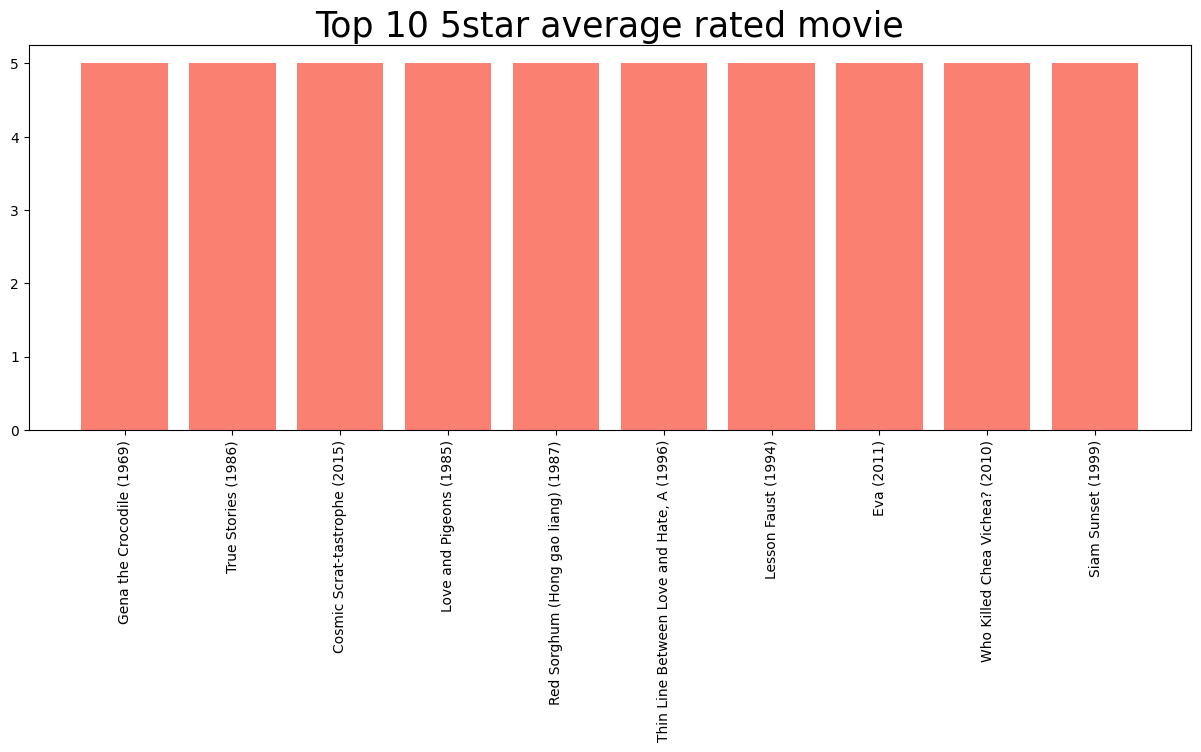

In [98]:
plt.figure(figsize=(15,5))
plt.bar(list(sorted_movie_rating.keys()[0:10]),list(sorted_movie_rating[0:10]),color="salmon")
plt.title("Top 10 5star average rated movie",fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
sorted_movie_rating.value_counts().keys()[0:10]

Float64Index([4.0, 3.0, 3.5, 2.5, 2.0, 4.5, 5.0, 3.75, 1.5, 3.25], dtype='float64')

In [51]:
b = dataset.groupby('title')['rating'].count()

In [52]:
b

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

In [53]:
sorted_number_of_rating = b.sort_values(ascending=False)

In [54]:
sorted_number_of_rating

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

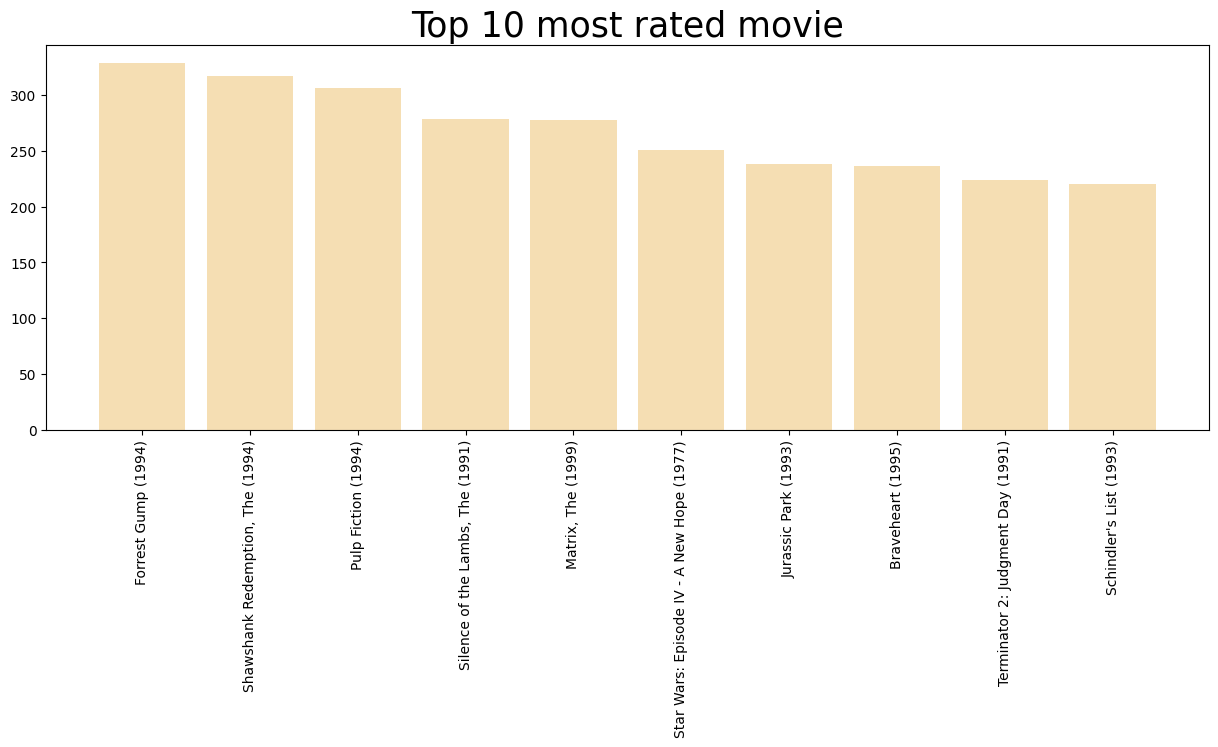

In [55]:
plt.figure(figsize=(15,5))
plt.bar(list(sorted_number_of_rating.keys()[0:10]),list(sorted_number_of_rating[0:10]),color="wheat")
plt.title("Top 10 most rated movie",fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

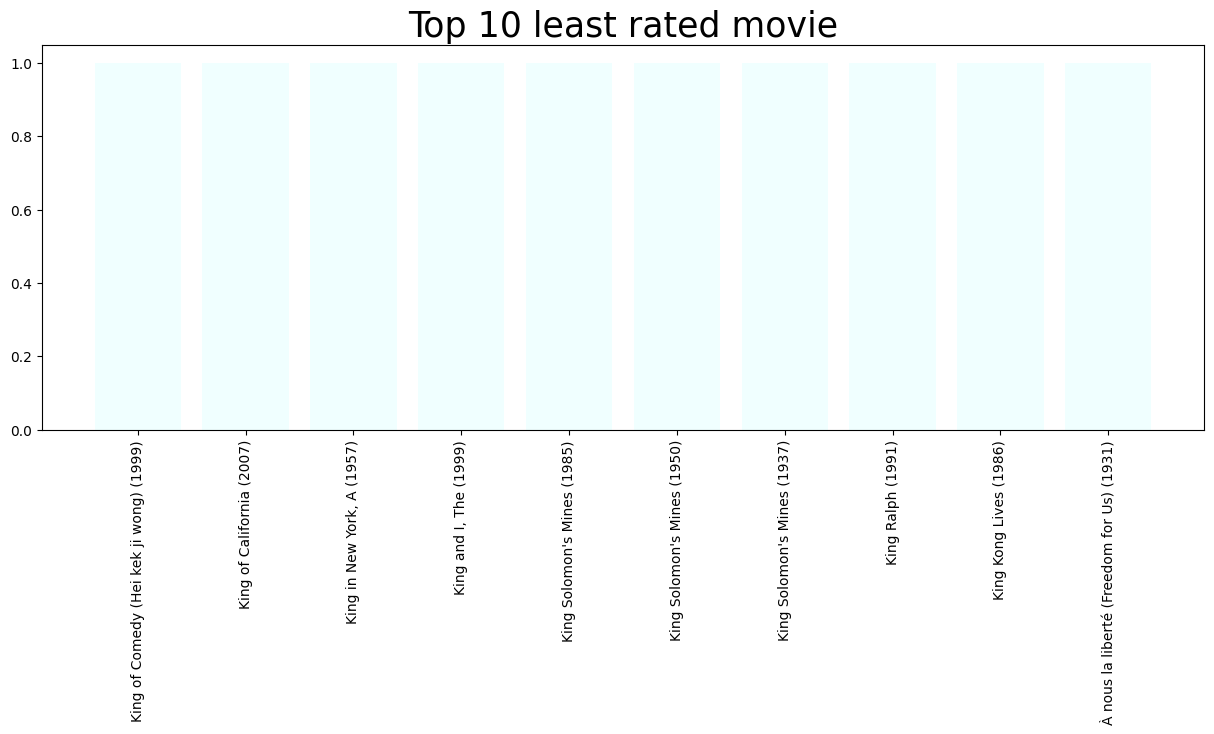

In [56]:
plt.figure(figsize=(15,5))
plt.bar(list(sorted_number_of_rating.keys()[-10:]),list(sorted_number_of_rating[-10:]),color="azure")
plt.title("Top 10 least rated movie",fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
new_record = pd.DataFrame()
new_record["Average_rating"] = a
new_record["Coount of total ratings"] = b

In [58]:
new_record.head()

,Average_rating,Coount of total ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<Axes: >

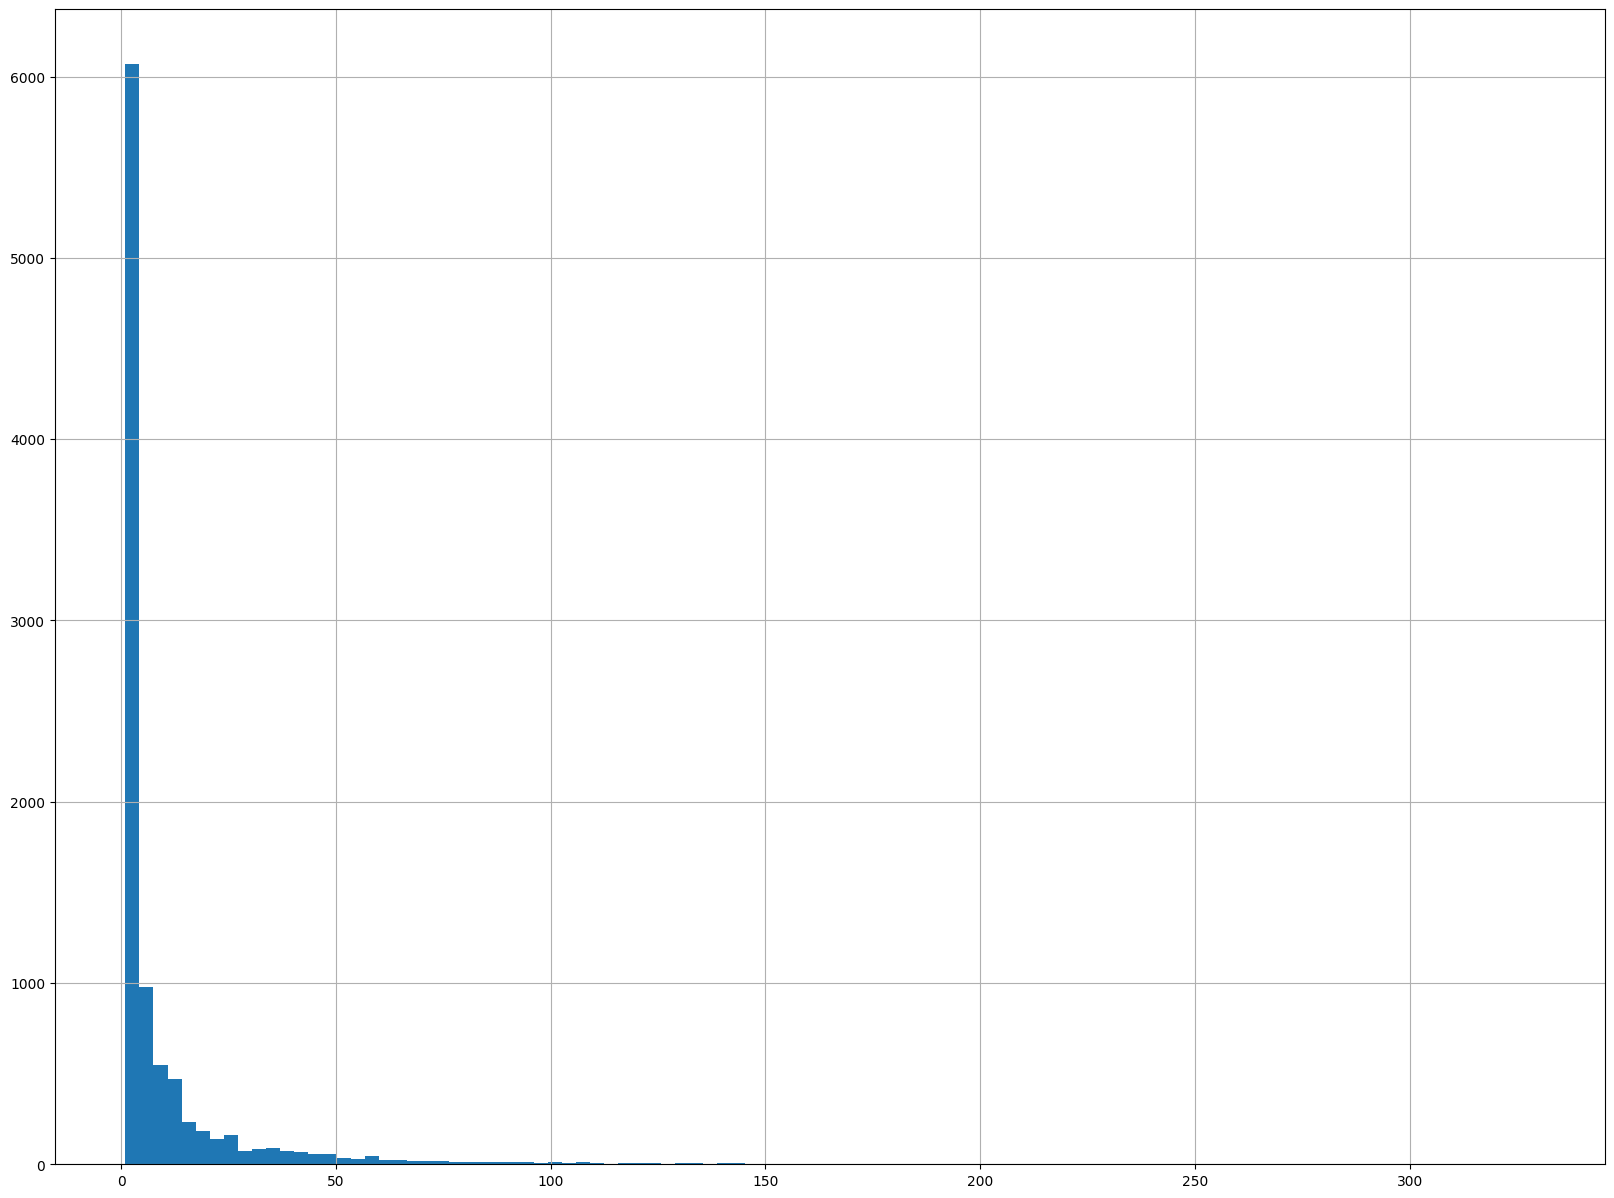

In [60]:
plt.figure(figsize=(20,15))
new_record['Coount of total ratings'].hist(bins=100)

<Axes: >

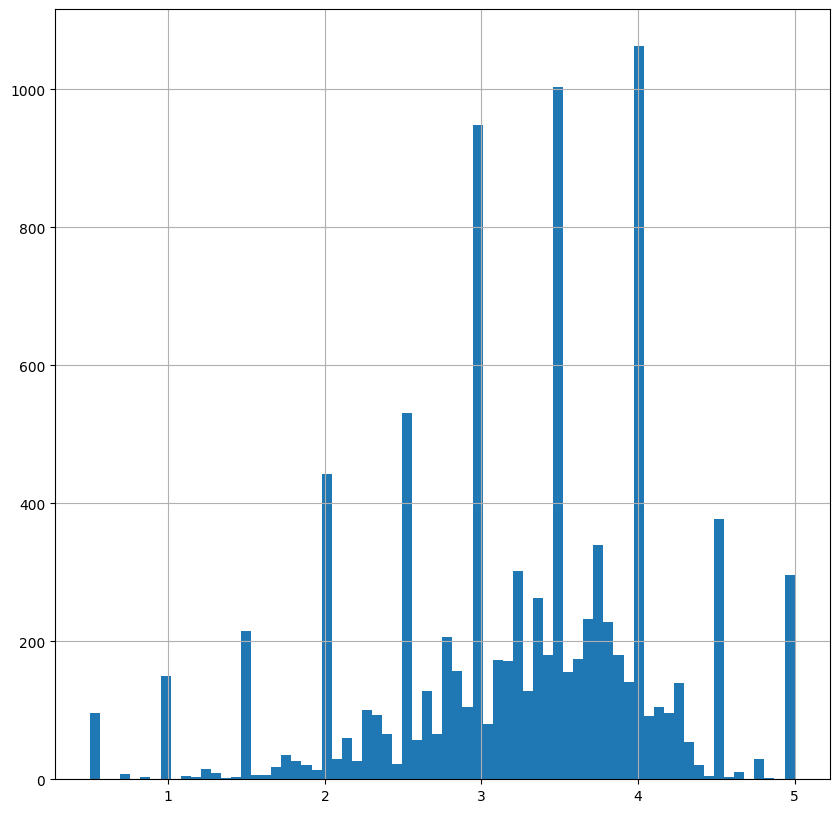

In [62]:
plt.figure(figsize=(10,10))
new_record["Average_rating"].hist(bins=70)

<Figure size 1000x1000 with 0 Axes>

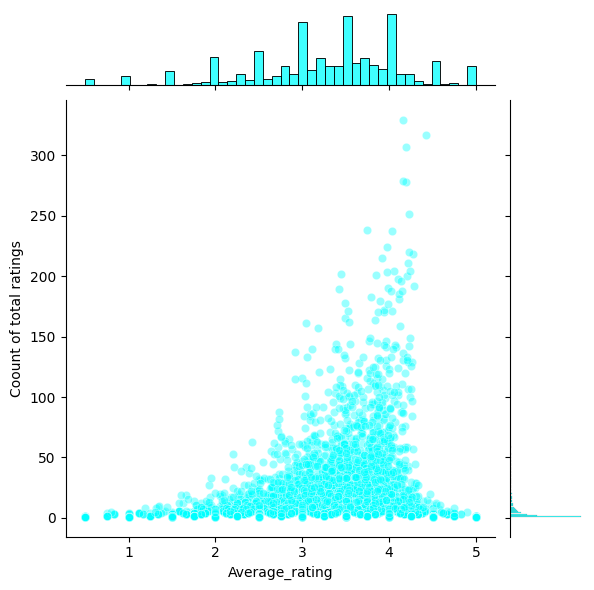

In [66]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Average_rating',y='Coount of total ratings',data=new_record,alpha=0.4,color="aqua")

In [68]:
moviematrix = dataset.pivot_table(index='userId',columns='title',values='rating')

#sorting values according to the no. of ratings

In [69]:
moviematrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
moviematrix.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [73]:
moviematrix['xXx (2002)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), Length: 610, dtype: float64

In [74]:
xXx_2002_ratings = moviematrix['xXx (2002)']

In [76]:
xXx_2002_ratings.tail()

userId
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), dtype: float64

In [77]:
movies_similar_to_xXx2002 = moviematrix.corrwith(xXx_2002_ratings)
movies_similar_to_xXx2002

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.762493
xXx (2002)                                   1.000000
xXx: State of the Union (2005)               0.943880
¡Three Amigos! (1986)                        0.500000
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

<ipython-input-78-a47e66685eb0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics = dataset.corr()


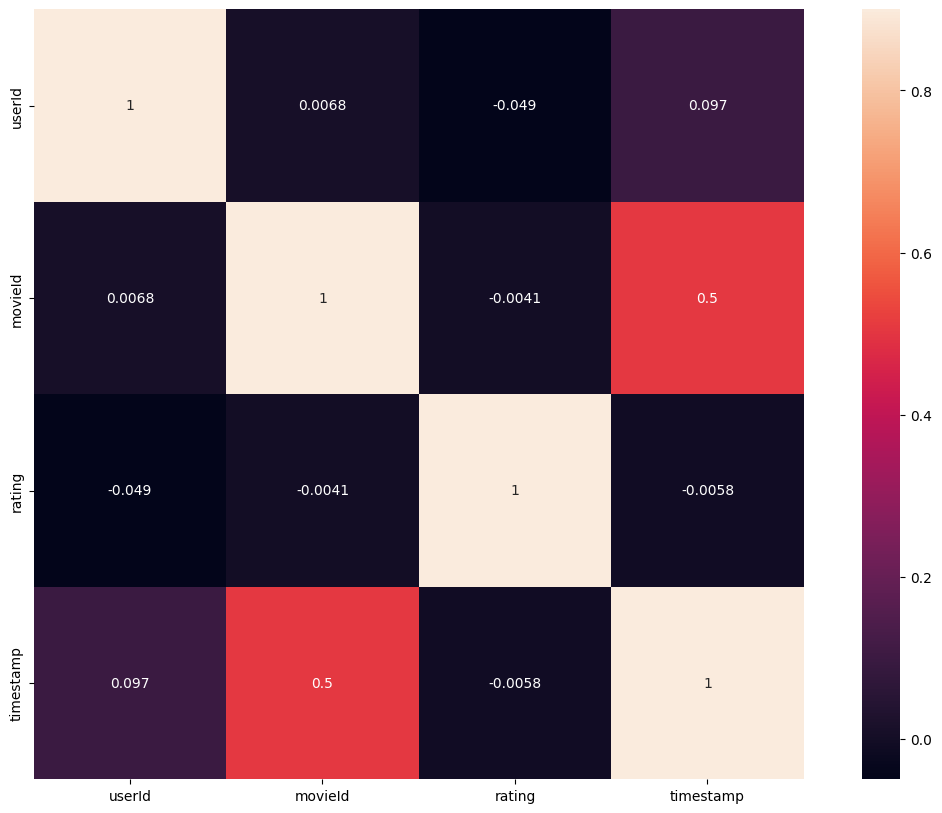

In [78]:
correlation_metrics = dataset.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_metrics,annot=True,vmax= .9,square=True)
plt.show()

In [79]:
xXx_2002_corelated = pd.DataFrame(movies_similar_to_xXx2002,columns=['Correlation'])

In [80]:
xXx_2002_corelated

,Correlation
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN
...,...
eXistenZ (1999),0.762493
xXx (2002),1.000000
xXx: State of the Union (2005),0.943880


In [81]:
xXx_2002_corelated.dropna(inplace=True)

In [82]:
xXx_2002_corelated

,Correlation
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325
...,...
[REC]² (2009),-1.000000
eXistenZ (1999),0.762493
xXx (2002),1.000000


In [85]:
xXx_2002_corelated.head()

,Correlation
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325


In [92]:
# This all movie we can recommand to the user once he/his completed watching the xXx_2002 movie

reccomendation_for_xXx_2002 = xXx_2002_corelated.sort_values(by='Correlation',ascending=False)
reccomendation_for_xXx_2002

,Correlation
title,
Gangster Squad (2013),1.0
Killers (2010),1.0
Richard III (1995),1.0
"Grey, The (2012)",1.0
The Hobbit: The Battle of the Five Armies (2014),1.0
...,...
Wing Commander (1999),-1.0
Mary and Max (2009),-1.0
Furious 7 (2015),-1.0


In [95]:
reccomendation_for_xXx_2002.value_counts()

Correlation
 1.000000      262
-1.000000      187
 1.000000      112
 0.000000       87
-1.000000       61
              ... 
-0.111457        1
-0.112018        1
-0.113795        1
-0.114049        1
 0.113664        1
Length: 1517, dtype: int64

In [96]:
reccomendation_for_xXx_2002[0:10]

#Top 10 most related movie

,Correlation
title,
Gangster Squad (2013),1.0
Killers (2010),1.0
Richard III (1995),1.0
"Grey, The (2012)",1.0
The Hobbit: The Battle of the Five Armies (2014),1.0
Snow Day (2000),1.0
Mary Shelley's Frankenstein (Frankenstein) (1994),1.0
Geri's Game (1997),1.0
Things to Do in Denver When You're Dead (1995),1.0


In [97]:
reccomendation_for_xXx_2002[-10:]

#Top 10 least related movie

,Correlation
title,
"Nightmare on Elm Street, A (2010)",-1.0
Mo' Better Blues (1990),-1.0
Evita (1996),-1.0
Bug (2007),-1.0
In the Mouth of Madness (1995),-1.0
Wing Commander (1999),-1.0
Mary and Max (2009),-1.0
Furious 7 (2015),-1.0
"Perfect Murder, A (1998)",-1.0


In [100]:
moviematrix['Jumanji: Welcome to the Jungle (2017)']
Jumanji_2017_ratings = moviematrix['Jumanji: Welcome to the Jungle (2017)']
movies_similar_to_Jumanji_2017 = moviematrix.corrwith(Jumanji_2017_ratings)
Jumanji_2017_corelated = pd.DataFrame(movies_similar_to_Jumanji_2017,columns=['Correlation'])
Jumanji_2017_corelated.dropna(inplace=True)
reccomendation_for_Jumanji_2017 = Jumanji_2017_corelated.sort_values(by='Correlation',ascending=False)
reccomendation_for_Jumanji_2017[0:10]

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Jumanji: Welcome to the Jungle (2017),1.0
Death Note (2017),1.0
Eragon (2006),1.0
Shrek 2 (2004),1.0
Prisoners (2013),1.0
Men in Black III (M.III.B.) (M.I.B.³) (2012),1.0
Ender's Game (2013),1.0
Moneyball (2011),1.0
Pirates of the Caribbean: On Stranger Tides (2011),1.0


In [102]:
moviematrix['The Fate of the Furious (2017)']
F_and_F_2017_ratings = moviematrix['The Fate of the Furious (2017)']
movies_similar_to_F_and_F_2017 = moviematrix.corrwith(F_and_F_2017_ratings)
F_and_F_2017_corelated = pd.DataFrame(movies_similar_to_F_and_F_2017,columns=['Correlation'])
F_and_F_2017_corelated.dropna(inplace=True)
reccomendation_for_F_and_F_2017 = F_and_F_2017_corelated.sort_values(by='Correlation',ascending=False)
reccomendation_for_F_and_F_2017[0:10]

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
101 Dalmatians (1996),1.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),1.0
Django Unchained (2012),1.0
Pirates of the Caribbean: The Curse of the Black Pearl (2003),1.0
FLCL (2000),1.0
Fargo (1996),1.0
Looper (2012),1.0
Finding Nemo (2003),1.0
"Fish Called Wanda, A (1988)",1.0
